In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

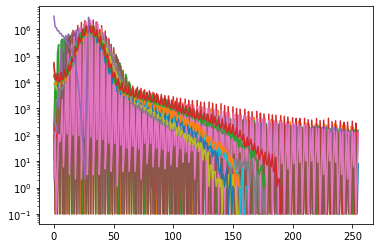

In [12]:
# check if 30 as the background still works

img = np.load('/home/yike/phd/cancer_cells_img_seq/data/202306_imaging/20230620_imaging/Dish1_G10.npz')

fig, ax = plt.subplots()
for val in img.values():
    val = (val / val.max() * 255).astype(np.uint8)
    
    y = np.bincount(val.ravel())
    ymax = y.argmax()
    
    val_aj = (val * 30.0 / ymax).astype(np.uint8)
    y = np.bincount(val_aj.ravel())

    x = np.arange(len(y))
    ax.plot(x, y+0.1)
    
ax.set_yscale('log')

In [84]:
def normalize_image(img):
    dd = (img / img.max() * 255).astype(np.uint8)
    dd = (dd * 30.0 / np.bincount(dd.ravel()).argmax()).astype(np.uint8)# normalized brightfield
    
    return dd

In [89]:
RGB_fnd = '/home/yike/phd/cancer_cells_img_seq/figures/batch_202306/fake_RGB_images/' # saving folder

fdn = '/home/yike/phd/cancer_cells_img_seq/data/202306_imaging/'
for sub_fdn in [i for i in os.listdir(fdn) if '.' not in i]:
    data = sub_fdn.split('_')[0]
    fdn_new = os.path.join(fdn, sub_fdn)
    fns = [i for i in os.listdir(fdn_new) if '.npz' in i]
    
    for fn in fns:
        grid = fn.split('.')[0]
        img = np.load(os.path.join(fdn_new, fn))
        rgb = []
        
        for i in [1, 6, 13]:
            nor_img = normalize_image(img[img.files[i]])
            rgb.append(nor_img)
        
        rgb = np.dstack(tuple(rgb))
        dd = Image.fromarray(rgb)
        
        dd.save(os.path.join(RGB_fnd, data + grid + '.png'))